###  Runs the quality analysis of a network.

The example contains: 
* Load a network.
* Run Water Quality analysis of a network.
* Compute Quality step by step.   
* Unload library.


In [1]:
from epyt import epanet

# Load a network.
d = epanet('Net2.inp')

EPANET version 20200 loaded (EPyT version v1.2.2 - Last Update: 10/05/2025).
Input File Net2.inp loaded successfully.



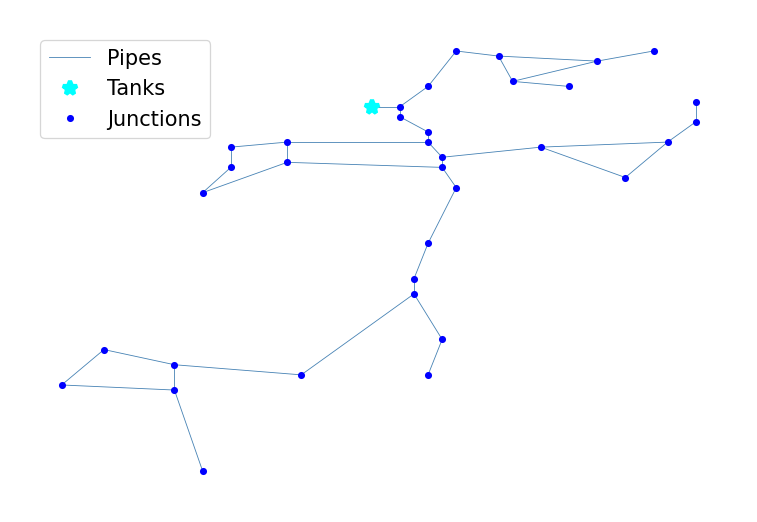

In [8]:
import matplotlib.pyplot as plt
d.plot()
plt.close('all')

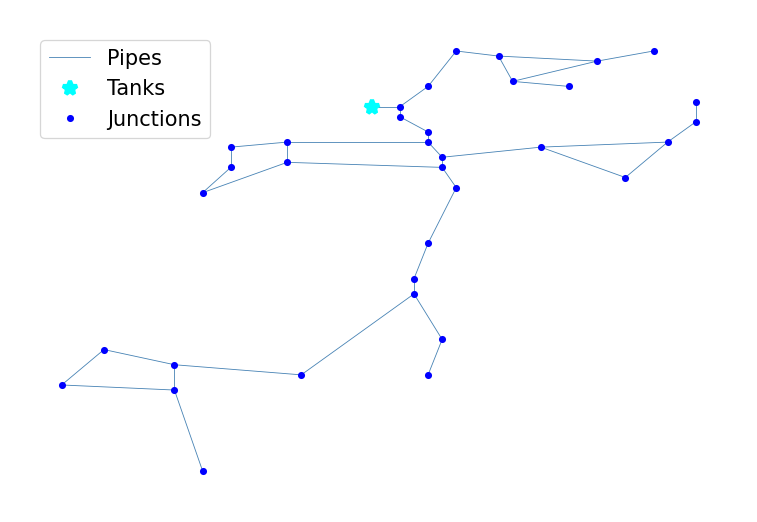

In [ ]:
# or add a semi colon
d.plot();




Time: [     0    300    600    900   1200   1500   1800   2100   2400   2700
   3000   3300   3600   3900   4200   4500   4800   5100   5400   5700
   6000   6300   6600   6900   7200   7500   7800   8100   8400   8700
   9000   9300   9600   9900  10200  10500  10800  11100  11400  11700
  12000  12300  12600  12900  13200  13500  13800  14100  14400  14700
  15000  15300  15600  15900  16200  16500  16800  17100  17400  17700
  18000  18300  18600  18900  19200  19500  19800  20100  20400  20700
  21000  21300  21600  21900  22200  22500  22800  23100  23400  23700
  24000  24300  24600  24900  25200  25500  25800  26100  26400  26700
  27000  27300  27600  27900  28200  28500  28800  29100  29400  29700
  30000  30300  30600  30900  31200  31500  31800  32100  32400  32700
  33000  33300  33600  33900  34200  34500  34800  35100  35400  35700
  36000  36300  36600  36900  37200  37500  37800  38100  38400  38700
  39000  39300  39600  39900  40200  40500  40800  41100  41400  4170

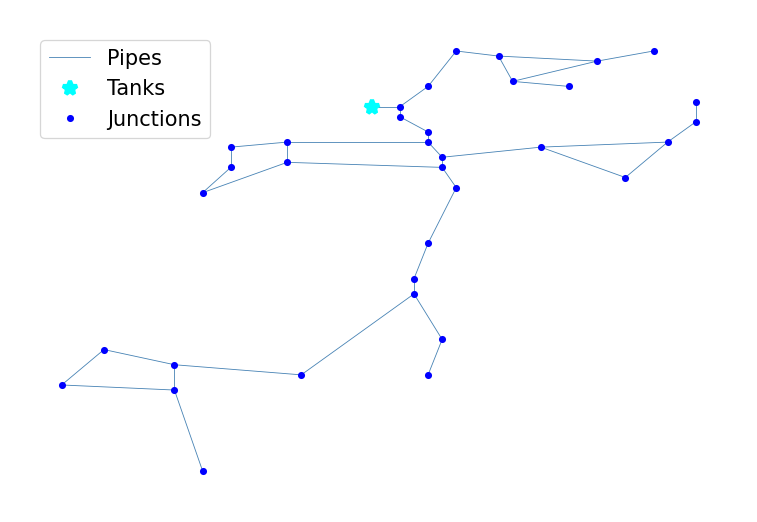

In [ ]:
# Run Water Quality analysis of a network (This function contains events)
qual_res = d.getComputedQualityTimeSeries()  # Value x Node, Value x Link
qual_res.disp()

In [18]:
# Compute Quality step by step.
d.solveCompleteHydraulics()
d.openQualityAnalysis()
d.initializeQualityAnalysis()
tleft, P, T, QsN, QsL = 1, [], [], [], []
while tleft > 0:
    t = d.runQualityAnalysis()
    P.append(d.getNodePressure())
    QsN.append(d.getNodeActualQuality())
    QsL.append(d.getLinkQuality())
    T.append(t)
    tleft = d.stepQualityAnalysisTimeLeft()

d.closeQualityAnalysis()

d.printv(QsN)


QsN = [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.]), array([0.98000002, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ]), array([0.98000002, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
 

In [3]:
# Unload library
d.unload()

Close toolkit for the input file "Net2". EPANET Toolkit is unloaded.

